In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math, time, random, datetime
import warnings
warnings.filterwarnings("ignore")

In [150]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

In [245]:
sample_submission = pd.read_csv("sample_submission.csv")

In [151]:
# Make the copy of original datasets 
train_original = train.copy()
test_original = test.copy()

In [152]:
train.columns, test.columns # Features of the datasets

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [153]:
train.dtypes # Datatypes in training set

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [154]:
test.dtypes # Datatypes in test set

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [155]:
train.shape, test.shape #Shape of datasets

((614, 13), (367, 12))

In [156]:
train.head() # To glance the values in dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [157]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


we can see that some of values are missing in LoanAmount and Credit_History column
We can see that many columns which is having non numnerical value has no been included in above step. So we have to do the data exploration of these columns individually to understand better.

We can create a heatmap and see the columns which are related but if there are any null values it can not be performed

In [158]:
#lets check the data if there are abnomalities, from the above describe 
# we can see the MAX of train data
train[train['ApplicantIncome']>20000].sort_values(by = 'ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N
284,LP001922,Male,Yes,0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,N
506,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,NaN,Urban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y


Let check if there are any null or any missing values in the entire dataframe

In [159]:
train[train['LoanAmount'] > 400 ].sort_values(by = 'ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
432,LP002386,Male,No,0,Graduate,NaN,12876,0.0,405.0,360.0,1.0,Semiurban,Y
278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N


In [160]:
# Can find the data required using SQL
train[train['LoanAmount'] > 400 ].sort_values(by = 'ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
432,LP002386,Male,No,0,Graduate,NaN,12876,0.0,405.0,360.0,1.0,Semiurban,Y
278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N


In [161]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [162]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

any text = train.apply(lambda col: col.fillna(col.mean()) if col.name in numerical_col else col.fillna(col.mode()[0]), axis=0)

Data Cleaning and Filling the data

In [163]:
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])

In [164]:
train['Married']=train['Married'].fillna(train['Married'].mode()[0])

In [165]:
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])

In [166]:
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

In [167]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mode()[0])
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mode()[0])

In [168]:
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])

In [169]:
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mode()[0])
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [170]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
train_std = train[num_cols]
test_std = test[num_cols]
train_std.head()
test_std.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5720,0,110.0,360.0
1,3076,1500,126.0,360.0
2,5000,1800,208.0,360.0
3,2340,2546,100.0,360.0
4,3276,0,78.0,360.0


In [171]:
train_std = (train_std[num_cols] - train_std[num_cols].mean()) / train_std[num_cols].std()
train_std.head()



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072931,-0.554036,-0.302513,0.273009
1,-0.134302,-0.038700,-0.207479,0.273009
2,-0.393427,-0.554036,-0.943988,0.273009
3,-0.461686,0.251774,-0.302513,0.273009
4,0.097649,-0.554036,-0.053050,0.273009


In [172]:
test_std = (test_std[num_cols] - test_std[num_cols].mean()) / test_std[num_cols].std()
test_std.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.186206,-0.672417,-0.431732,0.265659
1,-0.352211,-0.029808,-0.169296,0.265659
2,0.039587,0.098714,1.175687,0.265659
3,-0.502089,0.418306,-0.595754,0.265659
4,-0.311484,-0.672417,-0.956603,0.265659


In [173]:
train_std.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072931,-0.554036,-0.302513,0.273009
1,-0.134302,-0.038700,-0.207479,0.273009
2,-0.393427,-0.554036,-0.943988,0.273009
3,-0.461686,0.251774,-0.302513,0.273009
4,0.097649,-0.554036,-0.053050,0.273009


In [174]:
train.drop(num_cols, axis=1, inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y


In [175]:
train_final= pd.concat([train,train_std], axis=1)
train_final.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,0.072931,-0.554036,-0.302513,0.273009
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,-0.134302,-0.038700,-0.207479,0.273009
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,-0.393427,-0.554036,-0.943988,0.273009
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,-0.461686,0.251774,-0.302513,0.273009
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,0.097649,-0.554036,-0.053050,0.273009


In [176]:
test.drop(num_cols, axis=1, inplace=True)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban


In [177]:
test_final=pd.concat([test,test_std], axis=1)
test_final.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,0.186206,-0.672417,-0.431732,0.265659
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,-0.352211,-0.029808,-0.169296,0.265659
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,0.039587,0.098714,1.175687,0.265659
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,-0.502089,0.418306,-0.595754,0.265659
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,-0.311484,-0.672417,-0.956603,0.265659


Checking the data after filling the NAN values

In [178]:
train_final.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [179]:
test_final.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

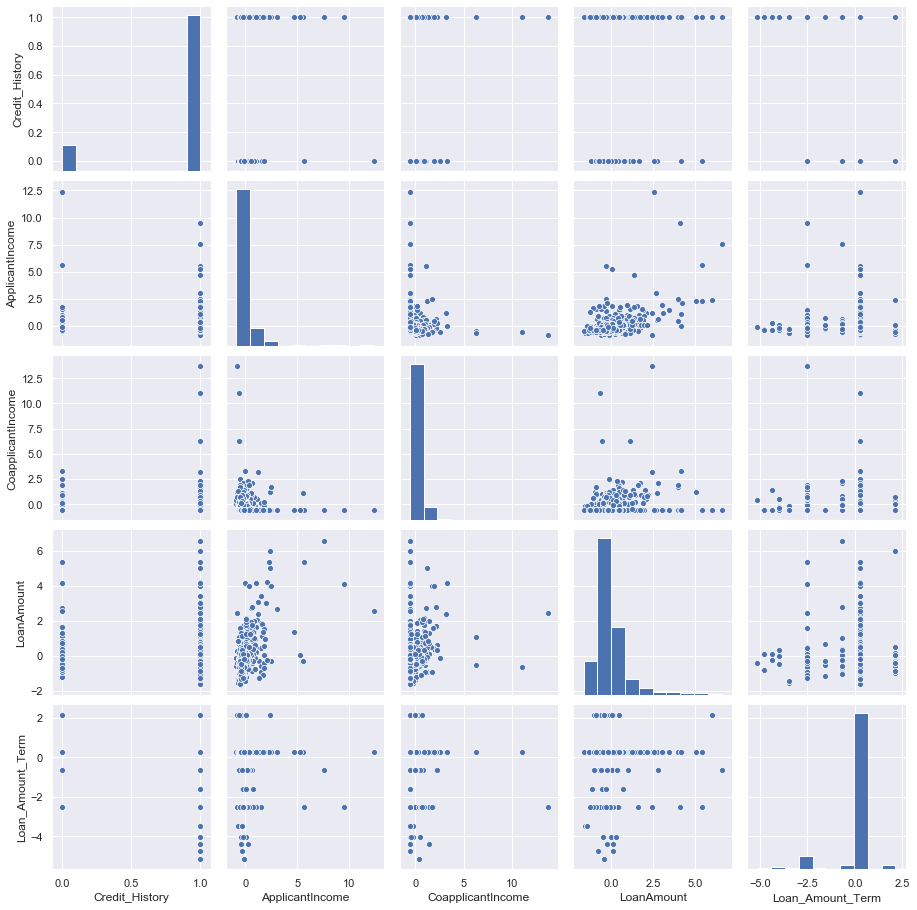

In [180]:
sns.pairplot(train_final)

Lets Visualize the data

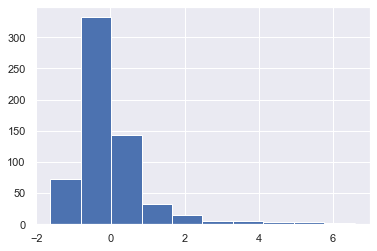

In [181]:
train_final['LoanAmount'].hist()

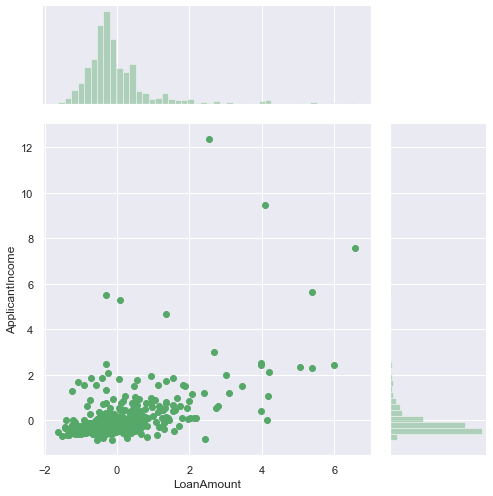

In [182]:
sns.jointplot("LoanAmount", "ApplicantIncome", data=train_final, kind="scatter",height=7, ratio=3, color="g")

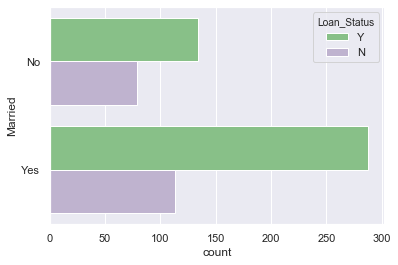

In [183]:
sns.countplot(y='Married', hue='Loan_Status', data=train_final,palette='Accent')

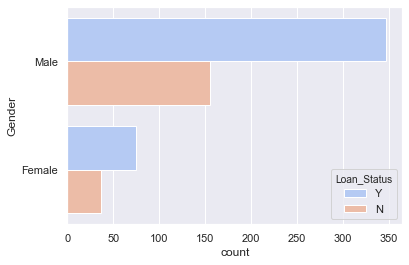

In [184]:
sns.countplot(y='Gender', hue='Loan_Status', data=train_final,palette='coolwarm')

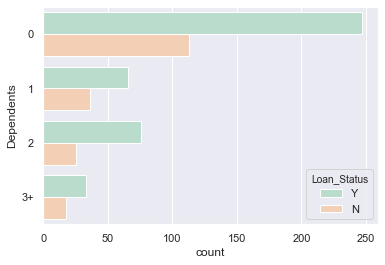

In [185]:
sns.countplot(y='Dependents', hue='Loan_Status', data=train,palette='Pastel2')

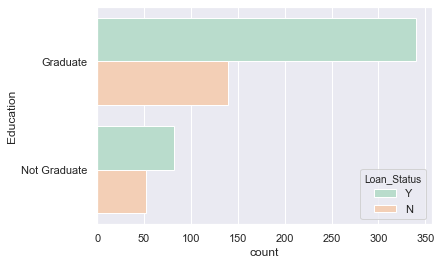

In [186]:
sns.countplot(y='Education', hue='Loan_Status', data=train_final,palette='Pastel2')

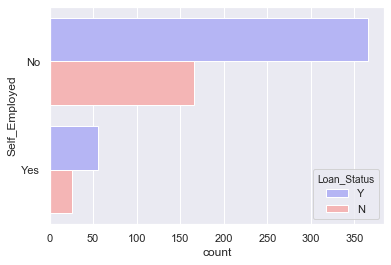

In [187]:
sns.countplot(y='Self_Employed', hue='Loan_Status', data=train_final,palette='bwr')

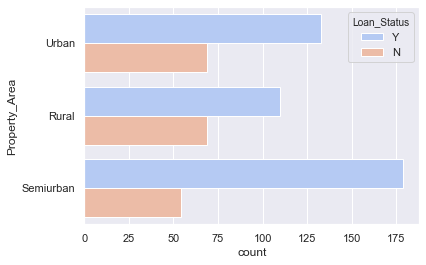

In [188]:
sns.countplot(y='Property_Area', hue='Loan_Status', data=train_final,palette='coolwarm')

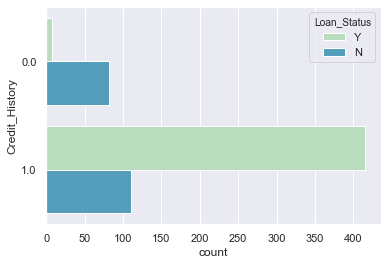

In [189]:
sns.countplot(y='Credit_History', hue='Loan_Status', data=train_final,palette='GnBu')

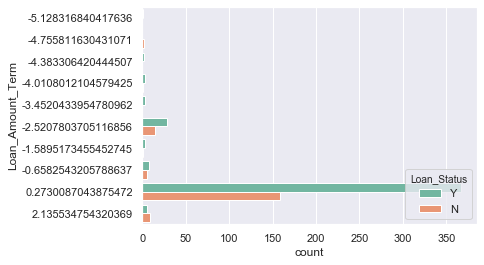

In [190]:
sns.countplot(y='Loan_Amount_Term', hue='Loan_Status', data=train_final,palette='Set2')

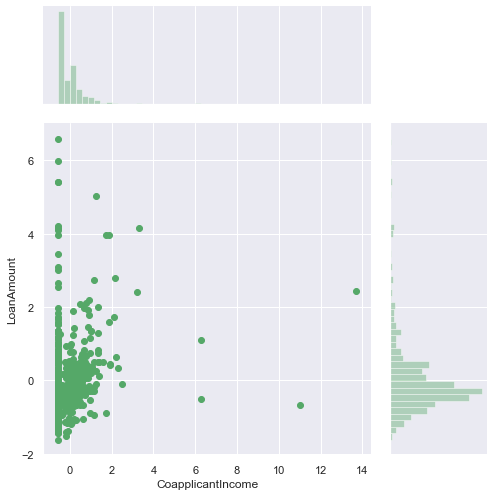

In [191]:
sns.jointplot("CoapplicantIncome","LoanAmount",data=train_final, kind="scatter",height=7, ratio=3, color="g")

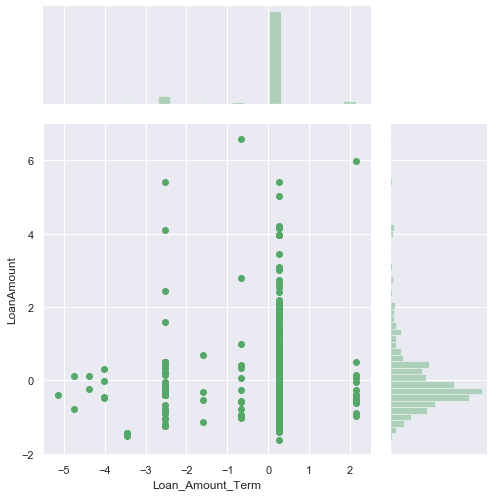

In [193]:
sns.jointplot("Loan_Amount_Term","LoanAmount",data=train_final, kind="scatter",height=7, ratio=3, color="g")

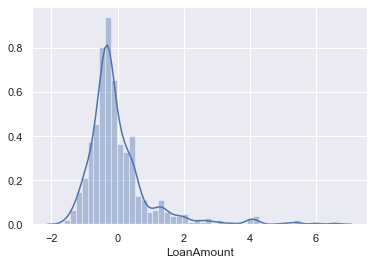

In [194]:
sns.distplot(train_final['LoanAmount'])

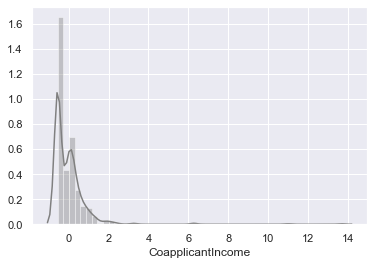

In [195]:
sns.distplot(train_final['CoapplicantIncome'],color='Gray')

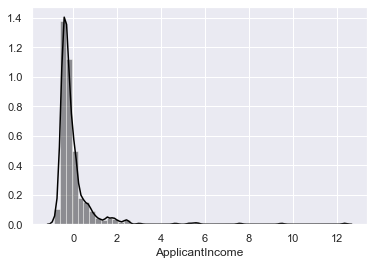

In [196]:
sns.distplot(train_final['ApplicantIncome'],color='Black')

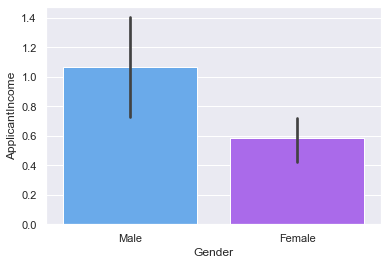

In [197]:
sns.barplot(x='Gender',y='ApplicantIncome',data=train_final,estimator=np.std,palette='cool')

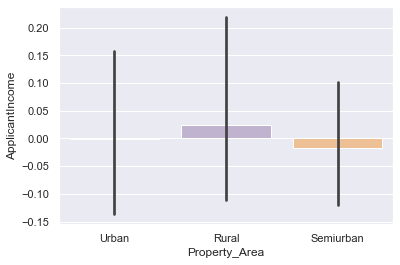

In [198]:
sns.barplot(x='Property_Area',y='ApplicantIncome',data=train_final,palette='Accent')

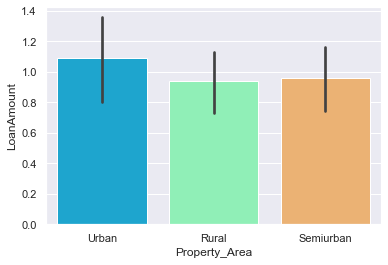

In [199]:
sns.barplot(x='Property_Area',y='LoanAmount',data=train_final,estimator=np.std,palette='rainbow')

Lets change the data into numerical values which can make it easy to find the correlation 

In [200]:
from sklearn.preprocessing import LabelEncoder

In [201]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [202]:
train_final['Gender'] = labelencoder.fit_transform(train_final['Gender'])
test_final['Gender'] = labelencoder.fit_transform(test_final['Gender'])

In [203]:
train_final['Married'] = labelencoder.fit_transform(train_final['Married'])
test_final['Married'] = labelencoder.fit_transform(test_final['Married'])

In [204]:
train_final['Dependents'] = train_final['Dependents'].map( {'3+':3, '0':0, '1':1, '2':2})
test_final['Dependents'] = test_final['Dependents'].map( {'3+':3, '0':0, '1':1, '2':2})

In [205]:
train_final['Education'] = labelencoder.fit_transform(train_final['Education'])
test_final['Education'] = labelencoder.fit_transform(test_final['Education'])

In [206]:
train_final['Self_Employed'] = train_final['Self_Employed'].map( {'No':0, 'Yes':1})
test_final['Self_Employed'] = test_final['Self_Employed'].map( {'No':0, 'Yes':1})

In [207]:
train_final['Education'] = train_final['Education'].map( {0:1, 1:0})
test_final['Education'] = test_final['Education'].map( {0:1, 1:0})

In [208]:
train_final['Property_Area'] = train_final['Property_Area'].map( {'Rural':0, 'Semiurban':1, 'Urban':2})
test_final['Property_Area'] = test_final['Property_Area'].map( {'Rural':0, 'Semiurban':1, 'Urban':2})

In [209]:
train_final['Loan_Status'] = train_final['Loan_Status'].map( {'Y':1, 'N':0})


In [210]:
train_final.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,LP001002,1,0,0,1,0,1.0,2,1,0.072931,-0.554036,-0.302513,0.273009
1,LP001003,1,1,1,1,0,1.0,0,0,-0.134302,-0.038700,-0.207479,0.273009
2,LP001005,1,1,0,1,1,1.0,2,1,-0.393427,-0.554036,-0.943988,0.273009
3,LP001006,1,1,0,0,0,1.0,2,1,-0.461686,0.251774,-0.302513,0.273009
4,LP001008,1,0,0,1,0,1.0,2,1,0.097649,-0.554036,-0.053050,0.273009
5,LP001011,1,1,2,1,1,1.0,2,1,0.002217,0.879882,1.443725,0.273009
6,LP001013,1,1,0,0,0,1.0,2,1,-0.502609,-0.035966,-0.599492,0.273009
7,LP001014,1,1,3,1,0,0.0,1,0,-0.387534,0.301668,0.148896,0.273009
8,LP001018,1,1,2,1,0,1.0,2,1,-0.228753,-0.032549,0.267688,0.273009
9,LP001020,1,1,1,1,0,1.0,1,0,1.217464,3.194108,2.417817,0.273009


In [211]:
train_final.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int64
Education              int64
Self_Employed          int64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
dtype: object

In [212]:
test_final.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,LP001015,1,1,0,1,0,1.0,2,0.186206,-0.672417,-0.431732,0.265659
1,LP001022,1,1,1,1,0,1.0,2,-0.352211,-0.029808,-0.169296,0.265659
2,LP001031,1,1,2,1,0,1.0,2,0.039587,0.098714,1.175687,0.265659
3,LP001035,1,1,2,1,0,1.0,2,-0.502089,0.418306,-0.595754,0.265659
4,LP001051,1,0,0,0,0,1.0,2,-0.311484,-0.672417,-0.956603,0.265659
5,LP001054,1,1,0,0,1,1.0,2,-0.537725,0.793590,0.257162,0.265659
6,LP001055,0,0,1,0,0,1.0,1,-0.525303,-0.672417,-1.268246,0.265659
7,LP001056,1,1,2,0,0,0.0,0,-0.188283,-0.672417,0.175151,0.265659
8,LP001059,1,1,2,1,0,1.0,2,1.797590,-0.672417,2.356648,-1.590248
9,LP001067,1,0,0,0,0,1.0,1,-0.489870,0.355758,-0.218503,0.265659


In [213]:
test_final.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int64
Education              int64
Self_Employed          int64
Credit_History       float64
Property_Area          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
dtype: object

Lets Create a heat map find the correlation factor

In [214]:
coef = train_final.corr()

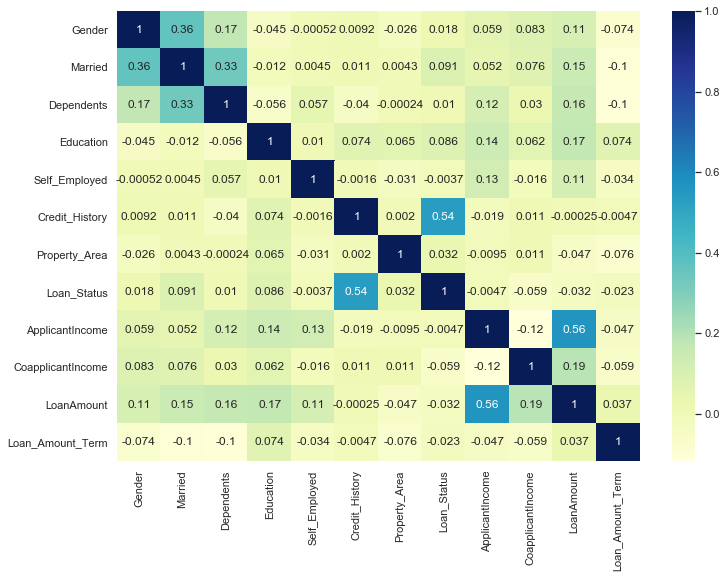

In [215]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(coef,annot=True,cmap="YlGnBu")

In [216]:
#Lets make a copy of train dataset which is changed into numerical value
train_int = train_final

In [217]:
# Now Split the dataframe into data and result
y_train = train_int.Loan_Status
X_train = train_int.drop(['Loan_Status','Loan_ID'], axis=1)

In [218]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,1,0,1.0,2,0.072931,-0.554036,-0.302513,0.273009
1,1,1,1,1,0,1.0,0,-0.134302,-0.038700,-0.207479,0.273009
2,1,1,0,1,1,1.0,2,-0.393427,-0.554036,-0.943988,0.273009
3,1,1,0,0,0,1.0,2,-0.461686,0.251774,-0.302513,0.273009
4,1,0,0,1,0,1.0,2,0.097649,-0.554036,-0.053050,0.273009


In [219]:
X_train.shape,y_train.shape

((614, 11), (614,))

In [220]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [221]:
# Create a function to fit ML algorithms
def fit_ml_algo(algo, X_train, y_train, cv):
    # algo is algorithms name
    # cv is cross-fold validation
    # One Pass
    model = algo.fit(X_train,y_train)
    acs = round(model.score(X_train,y_train)*100,2) #accuracy score
    
    # Cross Validation
    train_pred = model_selection.cross_val_predict(algo, X_train,y_train,cv=cv,n_jobs=-1)
    
    # Cross Validation Accuracy Score
    cvs = round(metrics.accuracy_score(y_train, train_pred)*100,3)
    
    # Precision Score
    ps = round(metrics.precision_score(y_train, train_pred)*100,3)
    
    # F1_score
    f1 = round(metrics.f1_score(y_train, train_pred)*100,3)
    
    #AUC score
    AUC = round(metrics.roc_auc_score(y_train, train_pred)*100,3)
    
    return train_pred, acs, cvs, f1, ps, AUC

Logistic Regression

In [222]:
# Logistic Regression
start_time = time.time()
train_pred_log, acs_log, cvs_log, f1_log, ps_log, AUC_log= fit_ml_algo(LogisticRegression(),X_train,y_train,10)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_log)
print("Accuracy CV 10-Fold: %s" %cvs_log)
print("F1 Score: %s" %f1_log)
print("Precision score: %s" %ps_log)
print("AUC score: %s" %AUC_log)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))

Accuracy: 81.27
Accuracy CV 10-Fold: 80.782
F1 Score: 87.526
Precision score: 79.008
AUC score: 70.406
Running Time: 0:00:01.976494


In [223]:
#K_Nearest Neighbour
start_time = time.time()
train_pred_knn, acs_knn, cvs_knn, f1_knn, ps_knn ,AUC_knn= fit_ml_algo(KNeighborsClassifier(),X_train,y_train,10)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_knn)
print("Accuracy CV 10-Fold: %s" %cvs_knn)
print("F1 Score: %s" %f1_knn)
print("Precision score: %s" %ps_knn)
print("AUC score: %s" %AUC_knn)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))

Accuracy: 82.25
Accuracy CV 10-Fold: 73.29
F1 Score: 82.627
Precision score: 74.713
AUC score: 61.834
Running Time: 0:00:00.109091


In [224]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_NB, acs_NB, cvs_NB, f1_NB, ps_NB ,AUC_NB= fit_ml_algo(GaussianNB(),X_train,y_train,10)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_NB)
print("Accuracy CV 10-Fold: %s" %cvs_NB)
print("F1 Score: %s" %f1_NB)
print("Precision score: %s" %ps_NB)
print("AUC score: %s" %AUC_NB)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))

Accuracy: 79.97
Accuracy CV 10-Fold: 79.316
F1 Score: 86.329
Precision score: 79.093
AUC score: 69.908
Running Time: 0:00:00.047997


In [225]:
#Linear Support Vector(SVC)
start_time = time.time()
train_pred_svc, acs_svc, cvs_svc, f1_svc, ps_svc ,AUC_svc= fit_ml_algo(LinearSVC(),X_train,y_train,10)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_svc)
print("Accuracy CV 10-Fold: %s" %cvs_svc)
print("F1 Score: %s" %f1_svc)
print("Precision score: %s" %ps_svc)
print("AUC score: %s" %AUC_svc)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))

Accuracy: 81.27
Accuracy CV 10-Fold: 80.782
F1 Score: 87.526
Precision score: 79.008
AUC score: 70.406
Running Time: 0:00:00.153113


In [226]:
#Stochastic Gradient Descent
start_time = time.time()
train_pred_SGD, acs_SGD, cvs_SGD, f1_SGD, ps_SGD ,AUC_SGD= fit_ml_algo(SGDClassifier(),X_train,y_train,10)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_SGD)
print("Accuracy CV 10-Fold: %s" %cvs_SGD)
print("F1 Score: %s" %f1_SGD)
print("Precision score: %s" %ps_SGD)
print("AUC score: %s" %AUC_SGD)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))


Accuracy: 80.46
Accuracy CV 10-Fold: 72.964
F1 Score: 81.007
Precision score: 78.319
AUC score: 66.422
Running Time: 0:00:00.051439


Using Decision Tree

In [227]:
start_time = time.time()
train_pred_DT, acs_DT, cvs_DT, f1_DT, ps_DT, AUC_DT= fit_ml_algo(DecisionTreeClassifier(),X_train,y_train,10)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_DT)
print("Accuracy CV 10-Fold: %s" %cvs_DT)
print("F1 Score: %s" %f1_DT)
print("Precision score: %s" %ps_DT)
print("AUC score: %s" %AUC_DT)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 71.661
F1 Score: 79.036
Precision score: 80.392
AUC score: 68.029
Running Time: 0:00:00.064016


In [228]:
# Gradient Boost Trees
start_time = time.time()
train_pred_GBC, acs_GBC, cvs_GBC, f1_GBC, ps_GBC,AUC_GBC = fit_ml_algo(GradientBoostingClassifier(),X_train,y_train,10)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_GBC)
print("Accuracy CV 10-Fold: %s" %cvs_GBC)
print("F1 Score: %s" %f1_GBC)
print("Precision score: %s" %ps_GBC)
print("AUC score: %s" %AUC_GBC)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))

Accuracy: 87.62
Accuracy CV 10-Fold: 78.827
F1 Score: 85.87
Precision score: 79.317
AUC score: 69.978
Running Time: 0:00:00.393122


In [229]:
# Random Forest Classifier
start_time = time.time()
train_pred_RF, acs_RF, cvs_RF, f1_RF, ps_RF,AUC_RF = fit_ml_algo(RandomForestClassifier(),X_train,y_train,10)

log_time = (time.time()-start_time)
print("Accuracy: %s" %acs_RF)
print("Accuracy CV 10-Fold: %s" %cvs_RF)
print("F1 Score: %s" %f1_RF)
print("Precision score: %s" %ps_RF)
print("AUC score: %s" %AUC_RF)
print("Running Time: %s" %datetime.timedelta(seconds=log_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 78.827
F1 Score: 85.808
Precision score: 79.555
AUC score: 70.262
Running Time: 0:00:00.693369


MODEL RESULTS

To know which model has done better
NOTE: Here we are considering F1 score.

In [230]:
f1_models = pd.DataFrame({
    'Model':['KNN', 'Logistic Regression', 'Navie Bayes', 
             'Stochastic Gradient Descent', 'Linear SVC', 'Decison Tree', 
             'Gradient Boosting Trees', 'Random Forest'],
    'Score':[f1_knn, f1_log, f1_NB, f1_SGD, f1_svc, f1_DT, f1_GBC, f1_RF]
    })
print('----------F1 Score---------')
f1_models.sort_values(by='Score', ascending=False)

----------F1 Score---------


,Model,Score
1,Logistic Regression,87.526
4,Linear SVC,87.526
2,Navie Bayes,86.329
6,Gradient Boosting Trees,85.870
7,Random Forest,85.808
0,KNN,82.627
3,Stochastic Gradient Descent,81.007
5,Decison Tree,79.036


In [231]:
cv_models = pd.DataFrame({
    'Model':['KNN', 'Logistic Regression', 'Navie Bayes', 
             'Stochastic Gradient Descent', 'Linear SVC', 'Decison Tree', 
             'Gradient Boosting Trees', 'Random Forest'],
    'Score':[cvs_knn, cvs_log, cvs_NB, cvs_SGD, cvs_svc, cvs_DT, cvs_GBC, cvs_RF]
    })
print('------ Cross Validation Score------')
cv_models.sort_values(by='Score', ascending=False)

------ Cross Validation Score------


,Model,Score
1,Logistic Regression,80.782
4,Linear SVC,80.782
2,Navie Bayes,79.316
6,Gradient Boosting Trees,78.827
7,Random Forest,78.827
0,KNN,73.290
3,Stochastic Gradient Descent,72.964
5,Decison Tree,71.661


In [232]:
AUC_models = pd.DataFrame({
    'Model':['KNN', 'Logistic Regression', 'Navie Bayes', 
             'Stochastic Gradient Descent', 'Linear SVC', 'Decison Tree', 
             'Gradient Boosting Trees', 'Random Forest'],
    'Score':[AUC_knn, AUC_log, AUC_NB, AUC_SGD, AUC_svc, AUC_DT, AUC_GBC, AUC_RF]
    })
print('----------AUC SCORE---------')
AUC_models.sort_values(by='Score', ascending=False)

----------AUC SCORE---------


,Model,Score
1,Logistic Regression,70.406
4,Linear SVC,70.406
7,Random Forest,70.262
6,Gradient Boosting Trees,69.978
2,Navie Bayes,69.908
5,Decison Tree,68.029
3,Stochastic Gradient Descent,66.422
0,KNN,61.834


Submission

In [233]:
test_final.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,LP001015,1,1,0,1,0,1.0,2,0.186206,-0.672417,-0.431732,0.265659
1,LP001022,1,1,1,1,0,1.0,2,-0.352211,-0.029808,-0.169296,0.265659
2,LP001031,1,1,2,1,0,1.0,2,0.039587,0.098714,1.175687,0.265659
3,LP001035,1,1,2,1,0,1.0,2,-0.502089,0.418306,-0.595754,0.265659
4,LP001051,1,0,0,0,0,1.0,2,-0.311484,-0.672417,-0.956603,0.265659


In [234]:
test.isnull().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
dtype: int64

In [237]:
# Copy of test_final to X_test
X_test = test_final.drop(['Loan_ID'], axis=1)

In [238]:
# Best Model
model = LogisticRegression()
model.fit(X_train,y_train)
y_test = model.predict(X_test)

In [243]:
# The result will be in 0 and 1 as Loan status is encoded to 0(NO) and 1(Yes)
y_test[:20]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [253]:
# Create a submission dataFrame and concatinate the LoanID and Predictions
submission = pd.DataFrame()
submission['Loan_ID'] = test_final['Loan_ID']
submission['Loan_Status'] = y_test
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [254]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [255]:
# To Submit the Loan_status should be 'Y' or 'N'.
submission['Loan_Status'] = submission['Loan_Status'].map({1:'Y', 0:'N'})
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [259]:
# Make sure the submission and test are of same length
if len(submission) == len(test):
    print("Submission dataframe is same length of test ({} rows)".format(len(submission)))
else:
    print("Dataframe length missmatched")

    

Submission dataframe is same length of test (367 rows)


In [264]:
# Convert Submission dataframe to CSV 
submission.to_csv('C:/Users/saivi/Documents/Machine Learning/Loan_Prediction/LogisticReg_Submission.csv', index=False)
print('Submission CSV is ready')

Submission CSV is ready


In [265]:
# Check the submission file 
submission_chk = pd.read_csv('C:/Users/saivi/Documents/Machine Learning/Loan_Prediction/LogisticReg_Submission.csv')
submission_chk.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
